# OpenPIV tutorial 1


In this tutorial we read the pair of images using `imread`, compare them visually 
and process using OpenPIV. Here the import is using directly the basic functions and methods

In [1]:
from openpiv import tools, process, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frame_a  = tools.imread( '../test1/exp1_001_a.bmp' )
frame_b  = tools.imread( '../test1/exp1_001_b.bmp' )

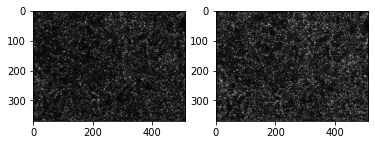

In [3]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [4]:
winsize = 24 # pixels
searchsize = 64  # pixels, search in image B
overlap = 12 # pixels
dt = 0.02 # sec


u0, v0, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )

In [5]:
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

In [6]:
u1, v1, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.3 )

In [7]:
u2, v2 = filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)

In [8]:
x, y, u3, v3 = scaling.uniform(x, y, u2, v2, scaling_factor = 96.52 )

In [9]:
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )

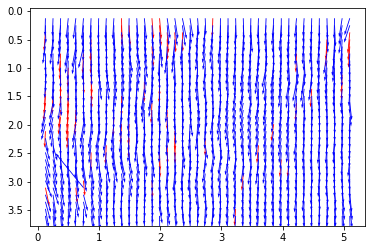

In [10]:
tools.display_vector_field('exp1_001.txt', scale=50, width=0.0025)